## Create 3 decoreter 
1) for Login (Logs the function name and when its was called)
2) timer (log how many time took for run)
3) Cache: Cache result of a function (for simple computation)

In [5]:
import time
from functools import wraps
import pandas as pd

def login_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print(f"[LOGIN] Function '{func.__name__}' was called at {time.strftime('%Y-%m-%d %H:%M:%S')}")
        return func(*args, **kwargs)
    return wrapper


def timer_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"[TIMER] Function '{func.__name__}' took {end - start:.4f} seconds to run.")
        return result
    return wrapper


def logger_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print(f"[LOGGER] Calling '{func.__name__}' with arguments {args} {kwargs}")
        result = func(*args, **kwargs)
        print(f"[LOGGER] '{func.__name__}' finished execution")
        return result
    return wrapper



def cache_decorator(func):
    cache = {}
    @wraps(func)
    def wrapper(*args):
        if args in cache:
            print(f"[CACHE] Returning cached result for {args}")
            return cache[args]
        result = func(*args)
        cache[args] = result
        print(f"[CACHE] Caching result for {args}")
        return result
    return wrapper




# ✅ Apply decorators
@cache_decorator
@timer_decorator
@logger_decorator

def fetch_covid_data():
    file_path = "owid-covid-data.csv"  # Local file name
    df = pd.read_csv(file_path)
    print(f"[DATA] Loaded {len(df)} rows from local file.")
    return df

# Call the function
my_df = fetch_covid_data()


[LOGGER] Calling 'fetch_covid_data' with arguments () {}
[DATA] Loaded 429435 rows from local file.
[LOGGER] 'fetch_covid_data' finished execution
[TIMER] Function 'fetch_covid_data' took 1.3837 seconds to run.
[CACHE] Caching result for ()


In [6]:
@timer_decorator
@logger_decorator
def clean_data():
    print("[CLEAN] Starting data cleaning process...")
    # df.dropna(inplace=True)  # Uncomment if you want to drop rows with NaN values
    my_df = my_df.dropna()  # Ensure colume me kasi bi jaga ap ko na mily to delete kar dena 
    print(f"[CLEAN] Cleaned data contains {len(my_df)} rows.")
    return my_df

In [12]:

@timer_decorator
@logger_decorator
def filter_country_data(df, country_name="Pakistan"):
    """
    Filters the DataFrame by country name from the 'location' column.

    Parameters:
    df (DataFrame): The full dataset.
    country_name (str): The country you want to filter, e.g. "Pakistan".

    Returns:
    DataFrame: Filtered data for the given country.
    """
    country_data = df[df['location'] == country_name]
    print(country_data.head())  # Show first 5 rows
    return country_data


pakistan_data = filter_country_data(my_df, "Pakistan")


[LOGGER] Calling 'filter_country_data' with arguments (       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        

#### Optional: Show specific columns
* Agar aap sirf kuch important columns dekhna chahte ho jaise date, new_cases, total_cases, people_vaccinated, to:

In [8]:
pakistan_data = my_df[my_df['location'] == "Pakistan"]
print(pakistan_data[['date', 'new_cases', 'total_cases', 'people_vaccinated']].head())

              date  new_cases  total_cases  people_vaccinated
290973  2020-01-05        0.0          0.0                NaN
290974  2020-01-06        0.0          0.0                NaN
290975  2020-01-07        0.0          0.0                NaN
290976  2020-01-08        0.0          0.0                NaN
290977  2020-01-09        0.0          0.0                NaN


In [14]:
# now  
import matplotlib.pyplot as plt
@timer_decorator
@logger_decorator
def plot_new_cases(df, country):
    df['date'] = pd.to_datetime(df['date'])
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['new_cases'], label='New Cases')
    plt.title(f'New COVID-19 Cases over Time in {country}')
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



[LOGGER] Calling 'plot_new_cases' with arguments (       iso_code continent  location        date  total_cases  new_cases  \
290973      PAK      Asia  Pakistan  2020-01-05          0.0        0.0   
290974      PAK      Asia  Pakistan  2020-01-06          0.0        0.0   
290975      PAK      Asia  Pakistan  2020-01-07          0.0        0.0   
290976      PAK      Asia  Pakistan  2020-01-08          0.0        0.0   
290977      PAK      Asia  Pakistan  2020-01-09          0.0        0.0   
...         ...       ...       ...         ...          ...        ...   
292642      PAK      Asia  Pakistan  2024-07-31    1580631.0        0.0   
292643      PAK      Asia  Pakistan  2024-08-01    1580631.0        0.0   
292644      PAK      Asia  Pakistan  2024-08-02    1580631.0        0.0   
292645      PAK      Asia  Pakistan  2024-08-03    1580631.0        0.0   
292646      PAK      Asia  Pakistan  2024-08-04    1580631.0        0.0   

        new_cases_smoothed  total_deaths  new_dea

C:\Users\AdeelRock\AppData\Local\Temp\ipykernel_15584\686347628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


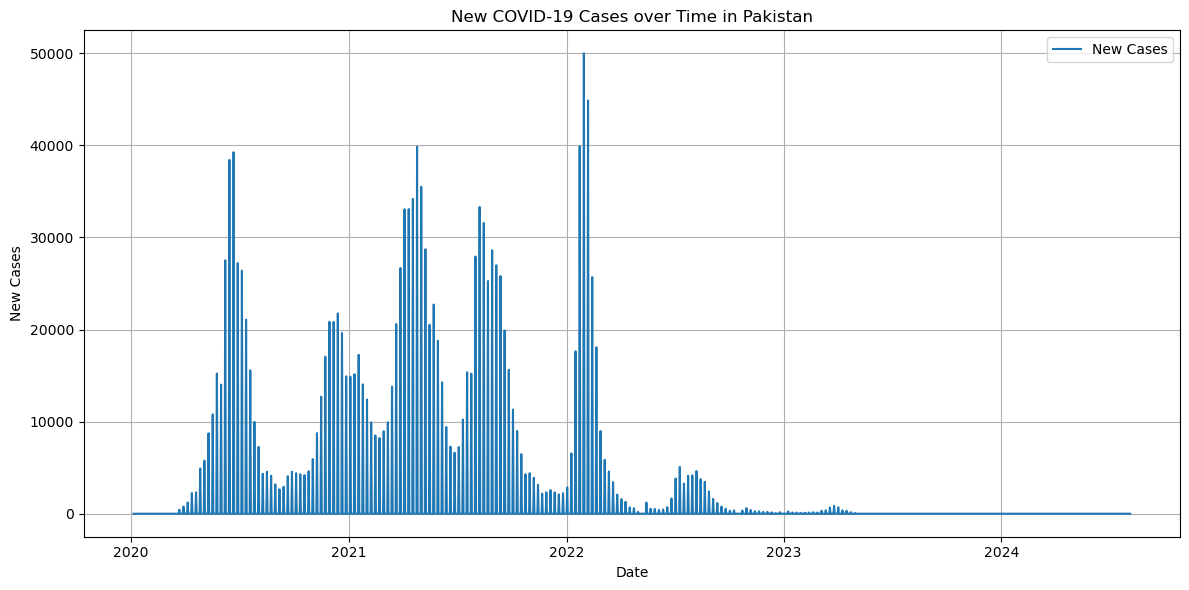

[LOGGER] 'plot_new_cases' finished execution
[TIMER] Function 'plot_new_cases' took 0.3438 seconds to run.


In [15]:
plot_new_cases(pakistan_data, "Pakistan")

In [18]:
def run_pipline(county_name="Pakistan"):
    df=fetch_covid_data()
    county_df=filter_country_data(df, "Pakistan")
    plot_new_cases(county_df, "Pakistan")

[CACHE] Returning cached result for ()
[LOGGER] Calling 'filter_country_data' with arguments (       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-

C:\Users\AdeelRock\AppData\Local\Temp\ipykernel_15584\686347628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


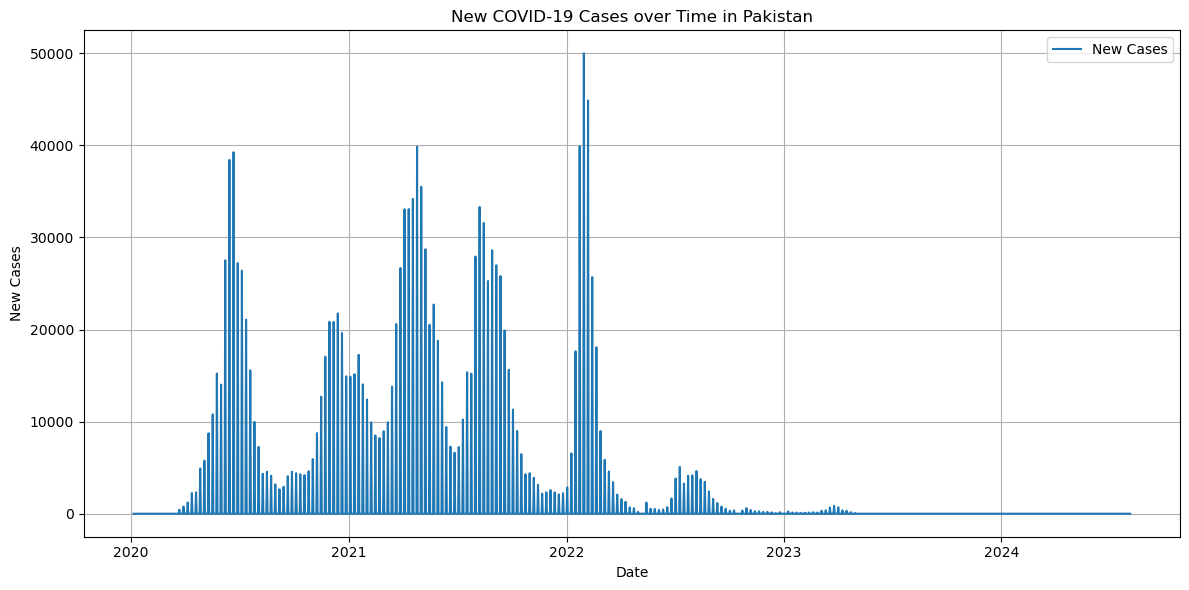

[LOGGER] 'plot_new_cases' finished execution
[TIMER] Function 'plot_new_cases' took 0.1761 seconds to run.


In [19]:
run_pipline('Pakistan')